# Treemap with Squarify

see [here](https://github.com/laserson/squarify) for reference

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generic-Example-from-Documentation" data-toc-modified-id="Generic-Example-from-Documentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generic Example from Documentation</a></span></li><li><span><a href="#Specific-Example:-Number-of-Transactions-per-Segment" data-toc-modified-id="Specific-Example:-Number-of-Transactions-per-Segment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Specific Example: Number of Transactions per Segment</a></span></li></ul></div>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import squarify

%matplotlib inline

## Generic Example from Documentation
Just for explanatory reasons. All the normalization is handled internally (see example below).

In [18]:
# These values define the coordinate system for the returned rectangles
# The values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.

values = [500, 433, 78, 25, 25, 7]

# Values must be sorted descending (and positive, obviously)
values.sort(reverse=True)

# The sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# Returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# Padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

## Specific Example: Number of Transactions per Segment

In [11]:
df = pd.read_csv('data/temp_df.csv')
df.head()

,Unnamed: 0,Frequency,Flags
0,0,129,top
1,1,75,top
2,2,398,top
3,3,57,top
4,4,261,top


In [16]:
# Transform df to sum the number of transactions by 'Flag'-segment
df_transformed = pd.DataFrame(df.groupby('Flags')['Frequency'].sum())
df_transformed.sort_values(['Frequency'], ascending=False, inplace=True)
df_transformed

,Frequency
Flags,
mid,134131
bottom,130679
low,81093
high,61842
top,12758


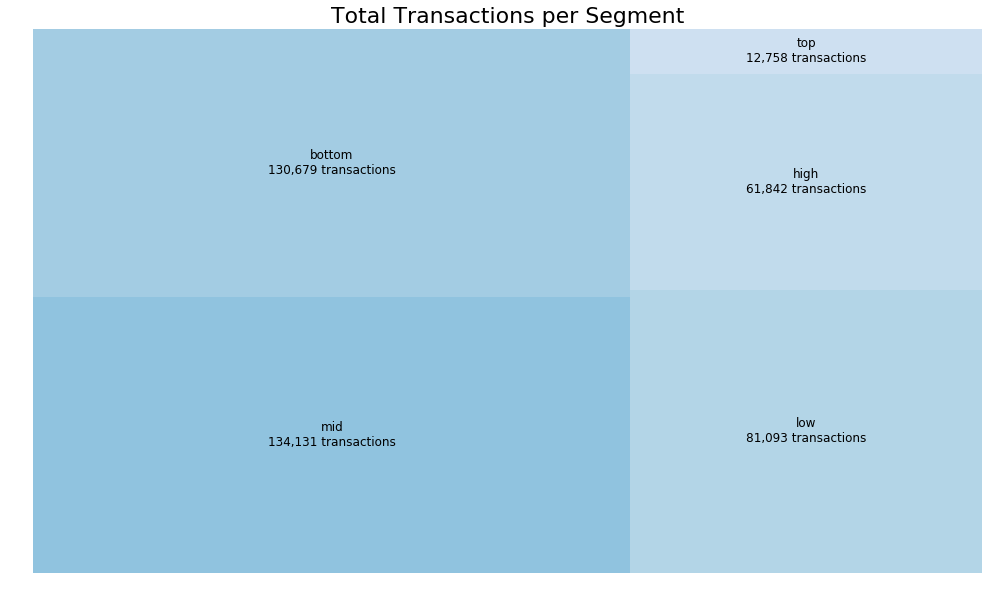

In [39]:
# Define colors
n_vals = [i for i in range(len(df_transformed))][::-1]
cmap = matplotlib.cm.Blues
mini=min(n_vals)-5
maxi=max(n_vals)+10
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in n_vals]

# Create Figure
plt.figure(figsize=(17,10))
squarify.plot(sizes=df_transformed['Frequency'], 
              label=[f'{x}\n{y:,.0f} transactions' for x,y in zip(df_transformed.index,
                                                           df_transformed['Frequency'])],
              alpha=.8,
              color=colors,
              text_kwargs={'fontsize':12})

# Styling
plt.axis('off')
plt.title('Total Transactions per Segment', fontsize=22);

# plt.savefig('./plots/treemap.png', bbox_inches='tight')

---